In [11]:
import torch
import torchvision
from torchvision import transforms, datasets
import torch.nn as nn
import torch.nn.functional as F
train = datasets.MNIST("", train=True, download=True, 
                      transform = transforms.Compose([transforms.ToTensor()]))




test = datasets.MNIST("", train=False, download=True, 
                      transform = transforms.Compose([transforms.ToTensor()]))

trainset = torch.utils.data.DataLoader(train, batch_size=10, shuffle=True)
testset = torch.utils.data.DataLoader(test, batch_size=10, shuffle=True)



class Net(nn.Module):
    #initialize model and layers
    def __init__(self):
        super().__init__() #refers to nn.Module
        self.fc1 = nn.Linear(28*28, 64) #fully connected 1st layer, (input, output), linear layer unlike conv2d
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 10)
        
    #data passes between layers
    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x, dim=1) #since want final array to sum to 1, probability distribution

net = Net()
print(net)


0it [00:00, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz


0it [00:00, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz


0it [00:00, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz


0it [00:00, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz
Processing...
Done!


/Users/test/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:335: UserWarning: The given NumPy array is not writable, and PyTorch does not support non-writable tensors. This means writing to this tensor will result in undefined behavior. You may want to copy the array to protect its data or make it writable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1670525474122/work/torch/csrc/utils/tensor_numpy.cpp:205.)
  return torch.from_numpy(parsed).view(length, num_rows, num_cols)


In [32]:
x = torch.rand((28,28)) #"generate random image"
x = x.view(-1, 28*28) #-1 speciies that input is of unknown shape
output = net(x)
print(output)

tensor([[-2.3632, -2.3094, -2.1994, -2.2702, -2.3479, -2.3346, -2.2830, -2.3524,
         -2.3666, -2.2158]], grad_fn=<LogSoftmaxBackward0>)


In [33]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr=0.001) #lr = learning rate

EPOCHS = 3 #iterations through entire dataset

for epochs in range(EPOCHS):
    for data in trainset:
        #data is a batch of featuresets and labels
        x, y = data #x is array of featuresets, y is array of the labels
        net.zero_grad() #reset gradient
        output = net(x.view(-1, 28*28))
        loss = F.nll_loss(output, y)
        loss.backward() #magically does backprop
        optimizer.step()
    print(loss)

tensor(0.0408, grad_fn=<NllLossBackward0>)
tensor(0.1363, grad_fn=<NllLossBackward0>)
tensor(0.0054, grad_fn=<NllLossBackward0>)


In [37]:
correct = 0
total = 0
with torch.no_grad(): #use model without doing backprop, to test data
    for data in trainset:
        x, y = data
        output = net(x.view(-1, 28*28))
        for idx, i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1
print("Accuracy: ", round(correct/total, 3))


Accuracy:  0.968


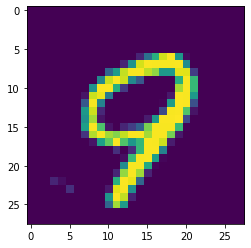

tensor(9)


In [52]:
import matplotlib.pyplot as plt
plt.imshow(x[9].view(28,28))
plt.show()
print(torch.argmax(net(x[9].view(-1,784))[0]))